### Logistic Regression with Gradient Descent: A Classification Exercise - #4
### Due: March 18th, 2020 ###

**In this exercise you are going to complete the code necessary for a supervised classification problem**  

We start by generating a set of points ($x_1,x_2$) to roughly cover the 2-dimensional plane.  Then we decide on curve that seperates points into two sets: First the inside and outside of the unit circle.  We the create a lable variable y with values 1 and 0 for points inside and outside.  Then we pick 6 features that are variables $1, x_1, x_2, x_1^2, x_2^2, and\ x_1x_2$ .  Our objective is to use the standard gradient descent method minimize a the cost function for the logistic regression hypothesis function, and have the program figure out the optimal coefficients among the features for the correct boundary.

This exercise takes you through 4 basic steps:

- Generating a simulated set of data and labels
- Constructing a set of features
- Writing the Cost function for logistic regression
- Gradient Descent for logistic regression

You will also apply the packaged logistic regression model from sklearn and compare with our own solution

Packages Used:  

**pandas** for data frames and easy to read csv files   
**numpy** for array and matrix mathematics functions  
**matplotlib** for plotting  
and **LogisticRegression** from sklearn.linear_model  

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Let us generate sufficient point to cover the x-y plane

In [0]:
np.random.seed(42)
m = 50000

#Now generate 5,000 points points within square [-3, 3] X [-3, 3]
X_data = np.random.uniform([-3,-3],[3,3], size=(m,2))

In [0]:
X_data.shape

(50000, 2)

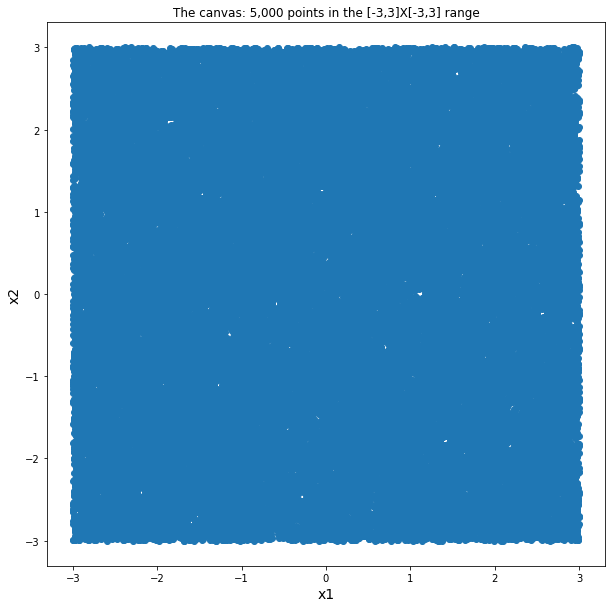

In [0]:
#Let's plot this simulated points on the plane
fig = plt.figure(figsize=(10,10))
plt.scatter(X_data[:,0], X_data[:,1])
plt.title('The canvas: 5,000 points in the [-3,3]X[-3,3] range')
plt.xlabel('x1', fontsize = 14)
plt.ylabel('x2', fontsize = 14)
plt.show()

### The features are: $$ 1, x_1, x_2, x_1^2, x_2^2, x_1*x_2$$

In [0]:
#Now we will create and stack the variables: the bias term - all ones, x1, x2, x2^2, and x2^2 into a feature matrix
features_2 = np.vstack((np.ones(len(X_data)), X_data[:,0], X_data[:,1], X_data[:,0]*X_data[:,0], 
                      X_data[:,1]*X_data[:,1],  X_data[:,0]*X_data[:,1])).astype(np.float32)

In [0]:
#As is standard, our features now will be made into columns and for convenience we call the matrix X
X = features_2.T.copy()

In [0]:
#Check to see we have the correct dimensions
X.shape

(50000, 6)

In [0]:
#Now create a empty label vector y
y = np.zeros(X.shape[0])

#### Now let us separate the points $x^2 + y^2 < 1$ from the rest

In [0]:
#The points are seperated by a circle.  Does this make sense?
y = (X[:,3] + X[:,4]) < 1

In [0]:
#y is a boolean vector of True and False, let's turn it into labels of 1 and 0
labels = y*1

In [0]:
#take a look at the labels
labels

array([0, 0, 0, ..., 0, 0, 1])

(array([45664.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4336.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

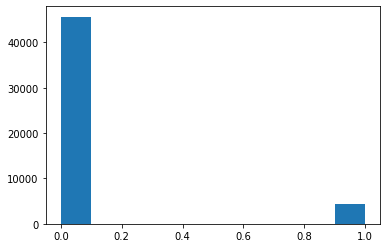

In [0]:
#Don't see anything?  Try this!
plt.hist(labels)

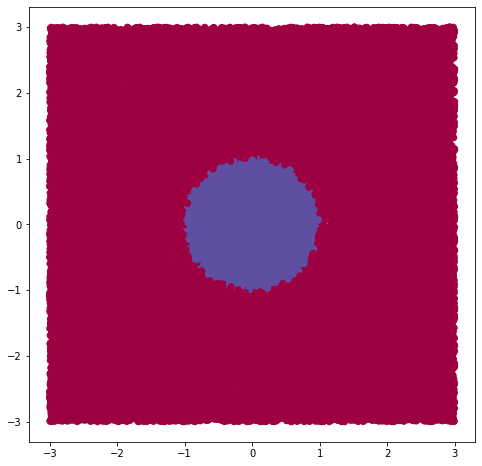

In [0]:
# Visualize the data:
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,1], X[:,2], c=y, s=40, cmap=plt.cm.Spectral);

### Now you going to start coding to develop the logistic regression model that seperates this data.  In other words, identify the boundary curve 

#### <font color='blue'> Exercise #1: </font> Complete the code for sigmoid function

In [0]:
#The function is the basic sigmoid function:  You can compelete in a single line of code
def sigmoid(scores):
    '''This function calculates the sigmoid of the input vector "scores"
    and returns the vector "logits" '''
    
    #### insert your code here ~ one line
    logits= 1/(1 + math.exp(-scores))
    scores = None
    
    return logits
    ######

#### <font color='blue'> Exercise #2: </font> The cost function for logistic regression

In [0]:
##Now you will have to complete the code for costFunction: 3 -4 lines of code
def costFunction(features,labels,weights):
    '''This function calculates the cost'''
    m = len(features)
    ##### insert your code here ~ two to three lines: use cost function for logistic regression#####
    x = sigmoid(np.dot(labels,weights))
    loss_y_hat = np.sum((features*np.log(x)) + ((1-features)*np.log(1-x)))
    
    ############
    cost = (-loss_y_hat)/m
    return cost

#### <font color='blue'> Exercise #3 </font> Complete the code for gradient descent for logistic regression

In [0]:
#This is the most interesting part of the assignment:  The gradient descent
# to calculate the optimal parameters

def log_reg(features, labels, num_steps, learning_rate):
    
    '''This function uses the sigmoid and costFunction and
    implement gradient descent and calculate the costs at every
    10,000 steps'''
        
    weights = np.zeros(features.shape[1])
    m = features.shape[0]
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        ####### insert your code here ~ two to three lines #########
        grad= costFunction(weights, features, labels)
        weights = weights -(learning_rate* grad)
        
        #######
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(costFunction(features,labels,weights))
        
    return weights

#### Scaling is important to keep the iterative process in check

In [0]:
from sklearn.preprocessing import MinMaxScaler  #we may need this if the square is larger

In [0]:
x_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X)

#### Call up the log_reg function that does gradient descent on the cost function, to render optimal values of $\hat\Theta$

In [0]:
##Let us now use our function to come up with the optimal parameters
Theta_hat = log_reg(X, labels,num_steps = 30000, learning_rate = 0.01)

TypeError: ignored

#### You would see numbers like these:

0.649746365538
0.0713032927782
0.0549840373037

In [0]:
## Take a look at the parameter set
Theta_hat

#### You ought to see these or numbers proportional to these

array([array([2.80780773, -0.01209348,  0.01057021, -3.06387661, -3.04460327, 0.0072521])])

#### Let us think about this: out of the all the coefficients of $\theta_0, \theta_1, \theta_2, \theta_3, \theta_4,\theta_5$ we know the nonzero labels correspond to the circle: $\theta_0,\theta_3,\theta_4$ and our procedure finds basically those and eliminates $\theta_1,\theta_2, and \theta_5$

#### In fact the actual parameter set:  Theta = np.array([1,0,0,-1,-1,0]) that corresponds to:
$$ 1 + 0x_1 + 0x_2 - x_1^2 - x_2^2 + 0x_1x_2$$

In [0]:
##Use our model parameters Theta_hat to predict the labels:  y_pred
y_pred = np.dot(X,Theta_hat)

In [0]:
##Make sure we are getting the correct shape: an array size (5000,)
y_pred.shape

(5000,)

In [0]:
## Now turn all output values greater than 0.5 to one class and others to second
y_hat = (y_pred >= 0.5).astype(int)

In [0]:
## Take a look:  array([0, 1, 1, ..., 1, 0, 1])?
y_hat

array([0, 0, 0, ..., 0, 0, 0])

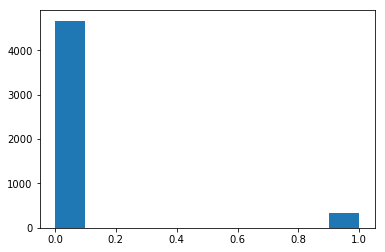

In [0]:
#Let us look at it another way
plt.hist(y_hat)
plt.show()


In [0]:
# Visualize the data what our classification did: If done correctly it out to look like the graph below:
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,1], X[:,2], c=y_hat, s=40, cmap=plt.cm.Spectral);

In [0]:
#Let us see how our modeling is doing
sum(np.abs(y_hat-labels))/len(X)

0.021399999999999999

### You should see something like:

0.0128

#### Now let us explore this a bit further: A mixed term $x_1^3 + x_2^3$ added on for labels

In [0]:
#y_3 = (X[:,2]*X[:,4]+X[:,1]*X[:,1]*X[:,1]) < 1
y_3 = (X[:,1]*X[:,1]*X[:,1] + X[:,2]*X[:,2]*X[:,2]) < 1

In [0]:
X[:,1]

array([-0.75275928,  1.3919636 , -2.06388807, ...,  2.06351852,
        1.67551732, -0.00331653], dtype=float32)

In [0]:
#Again we turn the labels to 0/1
labels_3 = y_3*1

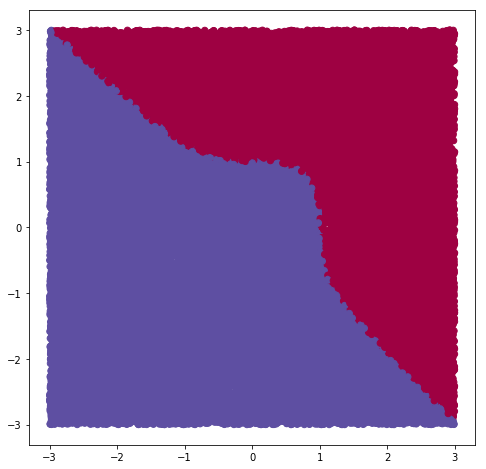

In [0]:
# Visualize the data what is labled
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,1], X[:,2], c=labels_3, s=40, cmap=plt.cm.Spectral);

#### Now we will use the sklearn package to effciently model the data, but use the original X

In [0]:
#Now we will use the sklearn package to effciently model the data, 
# but use the original X
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
model = log_reg.fit(X, labels_3)

In [0]:
#Get the prediction from the model
y3_hat = model.predict(X)

In [0]:
#Turn the labels from boolean to binary
y3_hat = y3_hat*1

#### Your graph should like like the following:

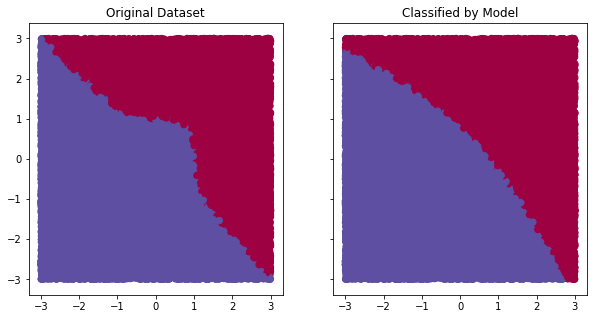

In [0]:
# Now let us take a look how the model is doing:
fig,axes = plt.subplots(1,2, figsize=(10,5), sharey = True)
# Visualize the data what is originally labled:
axes[0].scatter(X[:,1], X[:,2], c=labels_3, s=40, cmap=plt.cm.Spectral);
axes[0].set_title('Original Dataset')
# Now plot what the model classified:
axes[1].scatter(X[:,1], X[:,2], c=y3_hat, s=40, cmap=plt.cm.Spectral);
axes[1].set_title('Classified by Model')
plt.show()

#### Obviously our prediction is pretty poor!  It is becuase the terms we have allowed on goes only up to quadratics.  We need to include cubics.

In [0]:
#Let us see how our modeling is doing
sum(np.abs(y3_hat-labels_3))/len(y3_hat)

0.043279999999999999

#### You ought to see an accuray of 0.0512.  Not bad!  However the picture is not quite matching.  Can we do better?

#### <font color='blue'> Exercise #4:  </font> Now you add all terms up to and including 3rd degree terms such as $1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2, x_1x_2^2$  in to the feature list so our model is better

In [0]:
#####Construct the feature vector set.  Remember to include all the terms
##### including mixed terms that goes up to and including 3rd degree

####### insert your code here ~ one-two line #########

features_3 = (1 + X[:,1] + X[:,2] + X[:,3] + X[:,1]*X[:,1] + X[:,2]*X[:,2] + X[:,3]*X[:,3] + X[:,1]*X[:,2]*X[:,3] 
              + X[:,1]*X[:,1]*X[:,1] + X[:,2]*X[:,2]*X[:,2] + X[:,3]*X[:,3]*X[:,3] + X[:,1]*X[:,1]*X[:,2]*X[:,3] 
              + X[:,1]*X[:,2]*X[:,2]*X[:,3] + X[:,1]*X[:,2]*X[:,3]*X[:,3])

######

In [0]:
X3 = features_3.T.copy()

#### Now we will use the optimized sklearn package (instead of our implementation) to model the data, but use the X3 involving at most cubics

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
model = log_reg.fit(X3, labels_3)

In [0]:
model.coef_

array([[  5.44071898e+00,  -3.42409989e-01,  -3.20882036e-01,
          9.58219089e-03,  -1.17171146e-01,  -1.04876275e+01,
         -1.04915225e+01]])

In [0]:
y3_hat = model.predict(X3)

In [0]:
y3_hat = y3_hat*1

### Your graphs should look like the following

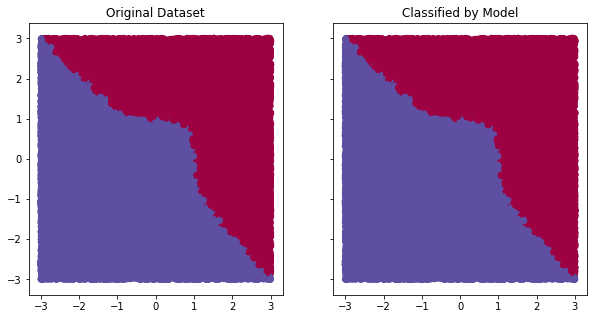

In [0]:
# Now let us take a look how the model is doing: If done correctly you ought to see the graphs below
fig,axes = plt.subplots(1,2, figsize=(10,5), sharey = True)
# Visualize the data what is originally labled:
axes[0].scatter(X[:,1], X[:,2], c=labels_3, s=40, cmap=plt.cm.Spectral);
axes[0].set_title('Original Dataset')
# Now plot what the model classified:
axes[1].scatter(X[:,1], X[:,2], c=y3_hat, s=40, cmap=plt.cm.Spectral);
axes[1].set_title('Classified by Model')
plt.show()

### Pretty close!

In [0]:
#Let us see how our modeling is doing
sum(np.abs(y3_hat-labels_3))/len(y3_hat)

0.00029999999999999997

#### You ought to see the percent of misclassified point to be around
0.0002

#### Much better than previous one

In [0]:
model.coef_

array([[  5.44071898e+00,  -3.42409989e-01,  -3.20882036e-01,
          9.58219089e-03,  -1.17171146e-01,  -1.04876275e+01,
         -1.04915225e+01]])

#### Is this what you expected? Notice the coefficients that remains and the one that are depressed, i.e. close to 0

#### Congratulations! This concludes our third assignment